In [261]:
!unzip Crimes.zip

Archive:  Crimes.zip
replace Crimes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
#Reading the data from csv.file
crimes_data = pd.read_csv('dataset/Crimes.csv')

In [5]:
#Checking the data contents
crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789052,JF350580,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,...,48.0,77,03,1165640.0,1939961.0,2022,01/03/2023 03:46:28 PM,41.990846,-87.666096,"(41.990846423, -87.666096144)"
1,12790581,JF352712,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,0810,THEFT,OVER $500,STREET,False,False,...,16.0,66,06,1161110.0,1863210.0,2022,01/03/2023 03:46:28 PM,41.780331,-87.684892,"(41.780330681, -87.684891779)"
2,12790652,JF352659,08/11/2022 10:00:00 AM,094XX S STATE ST,0810,THEFT,OVER $500,STREET,False,True,...,9.0,49,06,1177962.0,1842197.0,2022,01/03/2023 03:46:28 PM,41.722303,-87.623745,"(41.722303228, -87.623745129)"
3,12796135,JF359082,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,False,...,14.0,57,08A,1149844.0,1872244.0,2022,01/03/2023 03:46:28 PM,41.805347,-87.725961,"(41.805347066, -87.725961264)"
4,12795972,JF359058,08/16/2022 04:10:00 PM,015XX S HALSTED ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,11.0,28,06,1171290.0,1892413.0,2022,01/03/2023 03:46:28 PM,41.860250,-87.646715,"(41.860249838, -87.64671467)"


In [6]:
#Handling any inconsistensis of column names
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [7]:
#Checking the data for any null values and its datatypes
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237317 entries, 0 to 237316
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    237317 non-null  int64  
 1   case_number           237317 non-null  object 
 2   date                  237317 non-null  object 
 3   block                 237317 non-null  object 
 4   iucr                  237317 non-null  object 
 5   primary_type          237317 non-null  object 
 6   description           237317 non-null  object 
 7   location_description  236567 non-null  object 
 8   arrest                237317 non-null  bool   
 9   domestic              237317 non-null  bool   
 10  beat                  237317 non-null  int64  
 11  district              237317 non-null  int64  
 12  ward                  237307 non-null  float64
 13  community_area        237317 non-null  int64  
 14  fbi_code              237317 non-null  object 
 15  

In [8]:
#Check the data forany duplicates
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [9]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a 
# combination of Latitude and Longitude
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)

<AxesSubplot:>

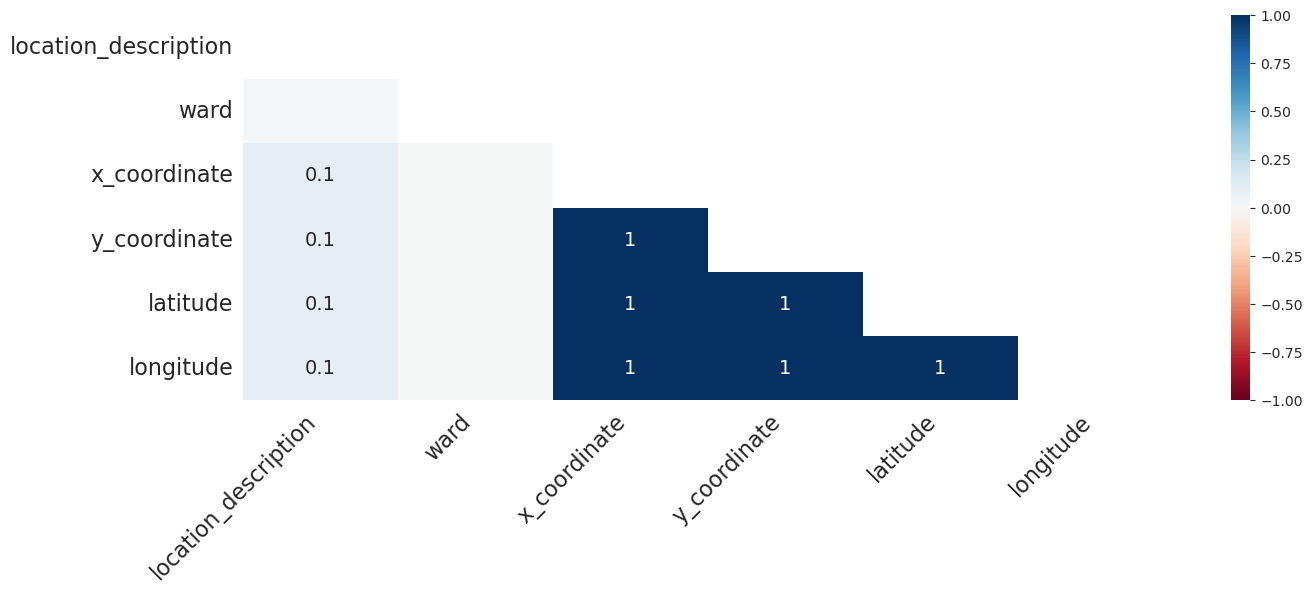

In [10]:
msno.heatmap(crimes_data,figsize=(15, 5))

<AxesSubplot:>

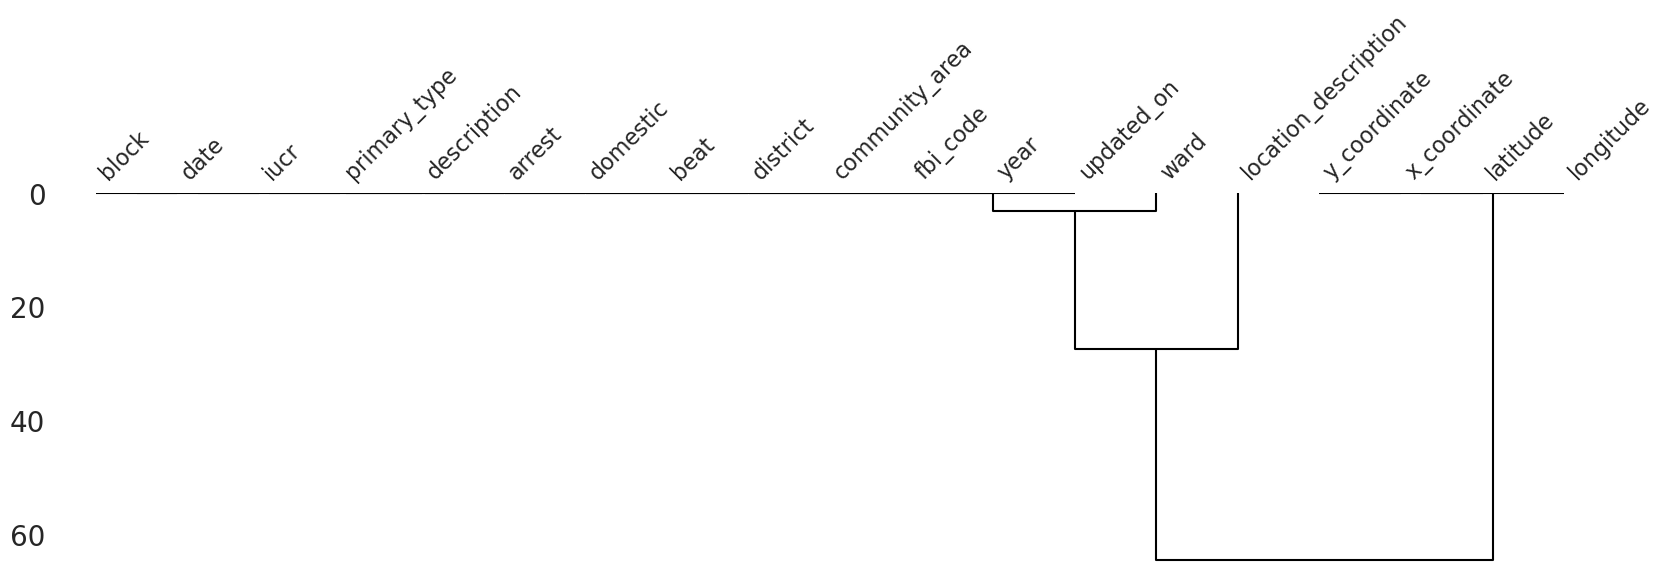

In [11]:
msno.dendrogram(crimes_data,figsize=(20,5))

As we can see from the above heatmap and dendogram that, the null values of latitude and longitude are highly co-ordinated with the x_coordinate and y_coordianate values respectively. A a co-relation of 1 here indicates that if any one of the value is missing the other one is also missing.

So we can safely remove observations where one of the values is zero. This should'nt affect our data and also limit the dropping of important observations.

In [12]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description     750
arrest                     0
domestic                   0
beat                       0
district                   0
ward                      10
community_area             0
fbi_code                   0
x_coordinate            4141
y_coordinate            4141
year                       0
updated_on                 0
latitude                4141
longitude               4141
dtype: int64

In [13]:
#Dropping observations where latitude is null/Nan
crimes_data.dropna(subset=['latitude'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

There are some data with ward and commnity_area missing, since they are very few in number we can go ahead and delete it

In [14]:
crimes_data.isnull().sum()

date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description    565
arrest                    0
domestic                  0
beat                      0
district                  0
ward                      9
community_area            0
fbi_code                  0
x_coordinate              0
y_coordinate              0
year                      0
updated_on                0
latitude                  0
longitude                 0
dtype: int64

In [15]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [16]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232602 entries, 0 to 232601
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  232602 non-null  object 
 1   block                 232602 non-null  object 
 2   iucr                  232602 non-null  object 
 3   primary_type          232602 non-null  object 
 4   description           232602 non-null  object 
 5   location_description  232602 non-null  object 
 6   arrest                232602 non-null  bool   
 7   domestic              232602 non-null  bool   
 8   beat                  232602 non-null  int64  
 9   district              232602 non-null  int64  
 10  ward                  232602 non-null  float64
 11  community_area        232602 non-null  int64  
 12  fbi_code              232602 non-null  object 
 13  x_coordinate          232602 non-null  float64
 14  y_coordinate          232602 non-null  float64
 15  

We ended up removing up around 6773 rows out of the 491007 rows, there are very low chances that we missed important observations. After handling all the NULL entries we ended up with a dataset of size 484234 . Which is still a better value for our analysis

In [17]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [18]:
#Mapping similar crimes under one group.
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [19]:
#Zone where the crime has occured
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [20]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [21]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [22]:
#Mapping crimes to ints to get better information from plots
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [ ]:
# save the cleaned data
crimes_data.to_csv('crimes_data_cleaned.csv', index=False)


In [23]:
crimes_data.columns

Index(['date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'day_of_week', 'month',
       'time', 'primary_type_grouped', 'zone', 'season', 'loc_grouped'],
      dtype='object')

In [24]:
# data types
crimes_data.dtypes

date                    datetime64[ns]
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                           int64
domestic                         int64
beat                             int64
district                         int64
ward                           float64
community_area                   int64
fbi_code                        object
x_coordinate                   float64
y_coordinate                   float64
year                             int64
updated_on                      object
latitude                       float64
longitude                      float64
day_of_week                     object
month                           object
time                             int64
primary_type_grouped            object
zone                            object
season                          object
loc_grouped              

In [25]:
crimes_data.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,updated_on,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,2022-08-09 16:07:00,014XX W ELMDALE AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,1,0,2013,20,...,01/03/2023 03:46:28 PM,41.990846,-87.666096,Tuesday,August,16,THEFT,West,Summer,PUBLIC_AREA
1,2022-08-10 16:00:00,062XX S ARTESIAN AVE,0810,THEFT,OVER $500,STREET,0,0,825,8,...,01/03/2023 03:46:28 PM,41.780331,-87.684892,Wednesday,August,16,THEFT,South,Summer,PUBLIC_AREA
2,2022-08-11 10:00:00,094XX S STATE ST,0810,THEFT,OVER $500,STREET,0,1,634,6,...,01/03/2023 03:46:28 PM,41.722303,-87.623745,Thursday,August,10,THEFT,South,Summer,PUBLIC_AREA
3,2022-08-15 21:14:00,048XX S KARLOV AVE,0560,ASSAULT,SIMPLE,RESIDENCE,0,0,815,8,...,01/03/2023 03:46:28 PM,41.805347,-87.725961,Monday,August,21,NON-CRIMINAL_ASSAULT,South,Summer,RESIDENCE
4,2022-08-16 16:10:00,015XX S HALSTED ST,0820,THEFT,$500 AND UNDER,SIDEWALK,0,0,1232,12,...,01/03/2023 03:46:28 PM,41.860250,-87.646715,Tuesday,August,16,THEFT,South,Summer,PUBLIC_AREA


In [21]:
#Grouping the data into years = (2018 and 2019) for analyzing
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]

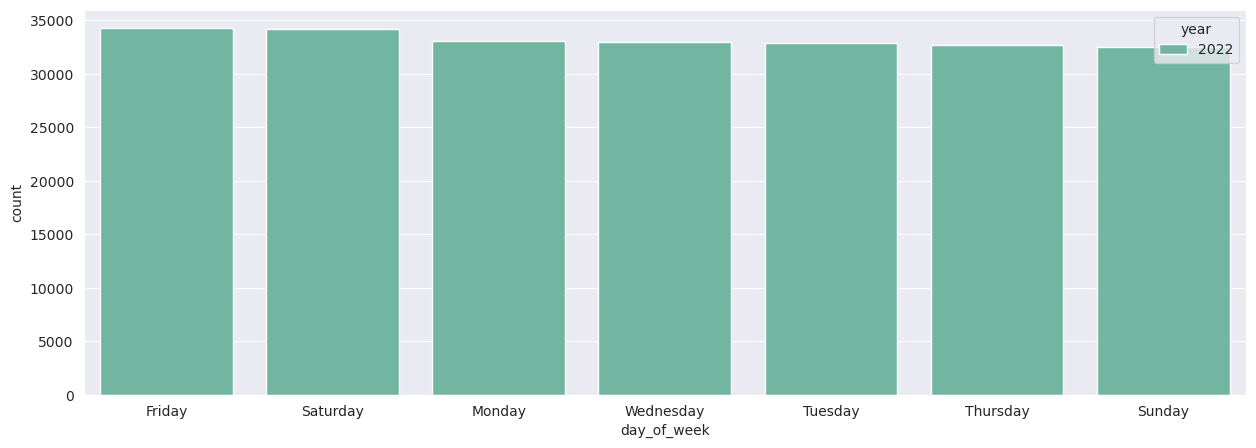

In [22]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

From the above plot we can see that the day of the week has very little influence on the crime, it seems like almost everyday the crimes count were the same.
But when it comes to 2018 and 2019 we can see that the number of crimes are less in 2019 than in 2018

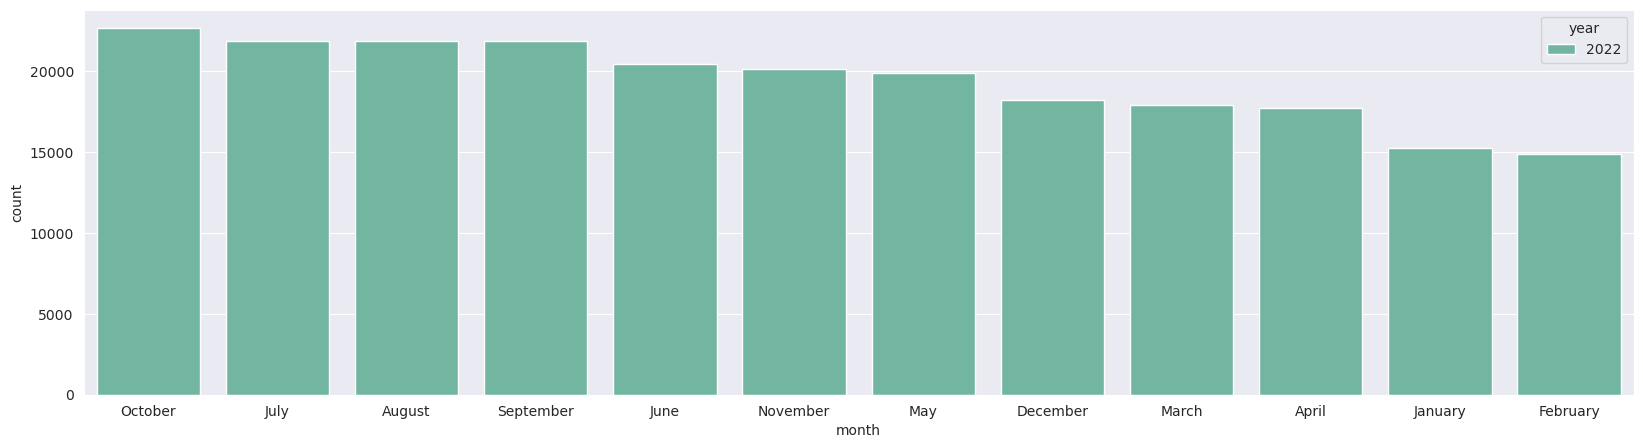

In [23]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

From the above plot we can see that May, June, July and August are the months were there are huge crime rates.
One thing is also to be noted here is that for the year 2019 there is no value for December is 0 since we dont have the data available yet and also november data is also very limited.
During February,January and November the crimes are less compared. It looks like the crime rate were low in winter's where people hardly come out of the houses.

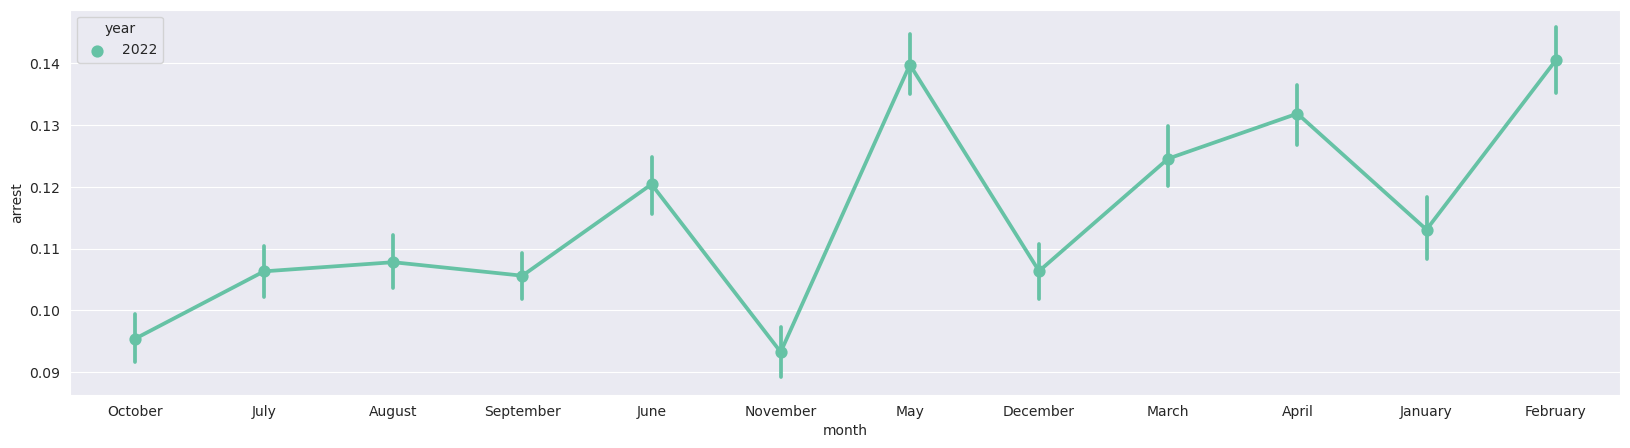

In [24]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data,x='month',y='arrest',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

The above plot gives the crimes that happened by hour of the day for the year 2018. Around midnight we can see there are a lot of crimes happening and it decreses gradually. There is a spike at 12 in the morning. We need to analyze more looking at the data as to why its happening. The crimes are also more around the evening.

We can see a similar trend in the year 2019 as well.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


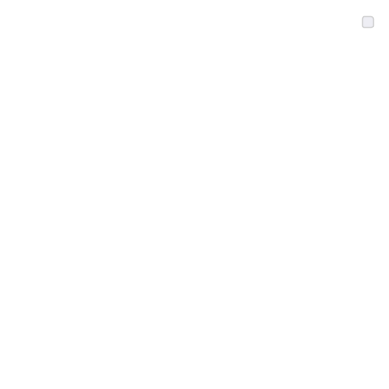

In [25]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.primary_type_grouped.value_counts(),labels=crimes_data_2018.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

By looking at the pie charts, we can see that there are a lot of Thefts and Non- Criminal Assault that happeened in the year 2019, there were very less sexual and weapons offence.
Theft and Non-Criminal Offence consitituted about 50% of the offence's

There is a same trend in the year 2019 as well, but the Thefts were a bit reduced but the count of the Non-Criminal Offence went up

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


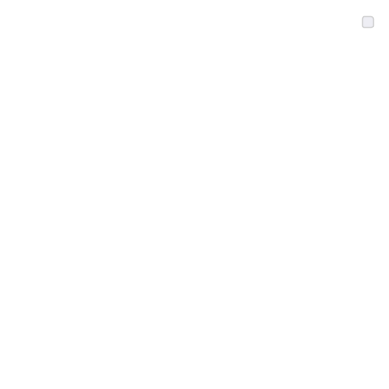

In [26]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.loc_grouped.value_counts(),labels=crimes_data_2018.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

From the above plot we can see that a lot of crimes happenen in pulic places and residence.Almost 60% of the incidents happened in these places.
Public transportation and Government places had very less crimes, so we can deploy more forces in resedential areas to reduce the crime rate.

The below plot of the year 2019 shows a same trend as in 2018

We see from the above plots that there were a lot of THEFT and BATTERY related crimes that happened over the last two years.

From the below plot we can see that the East side of the city experienced fewer crimes. South Side had the greatest number of crimes.? Reason. Has to be found out. Is it because of the type of citizens? Or are there more beats in the east zone compared to south zone

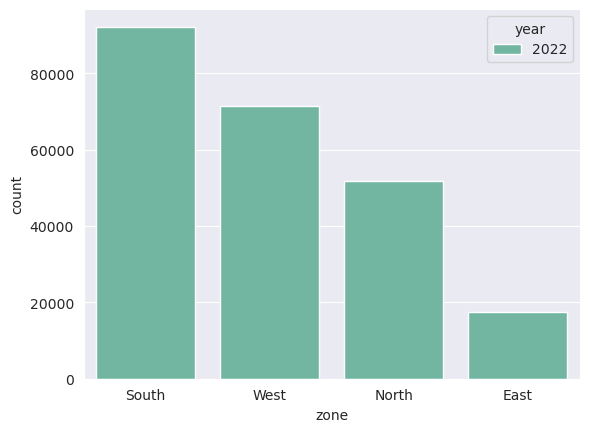

In [27]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

We can see from the below plot that a lot of crimes happening in Summer and Spring, where the weather conditions are favourable. There are very less crimes comparably in Winters

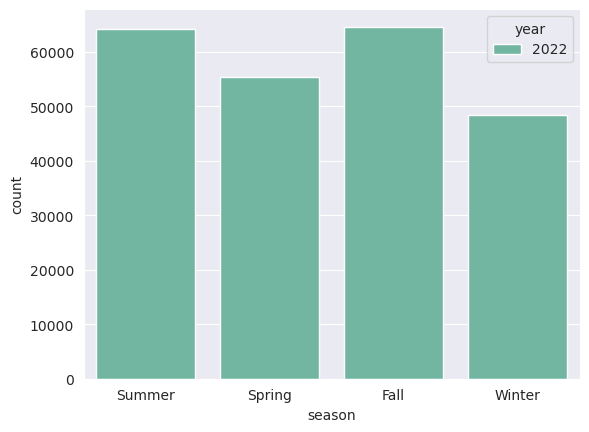

In [28]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

As we see from the below plot,there were a lot of criminals who were not arrested for the crime. The same trend has continued for 2019 as well. Almost 75% of the criminals went un-arrested for their crime in 2018.

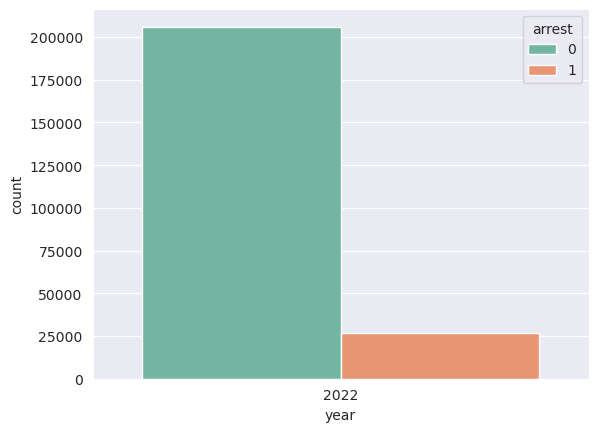

In [29]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

By Looking at the two plots for the years 2018 and 2019 for the location of crime, we can see that the trend continues, A lot of street and Residential crimes are happening in the city. The trend slowly fades out.

# Complete Data 

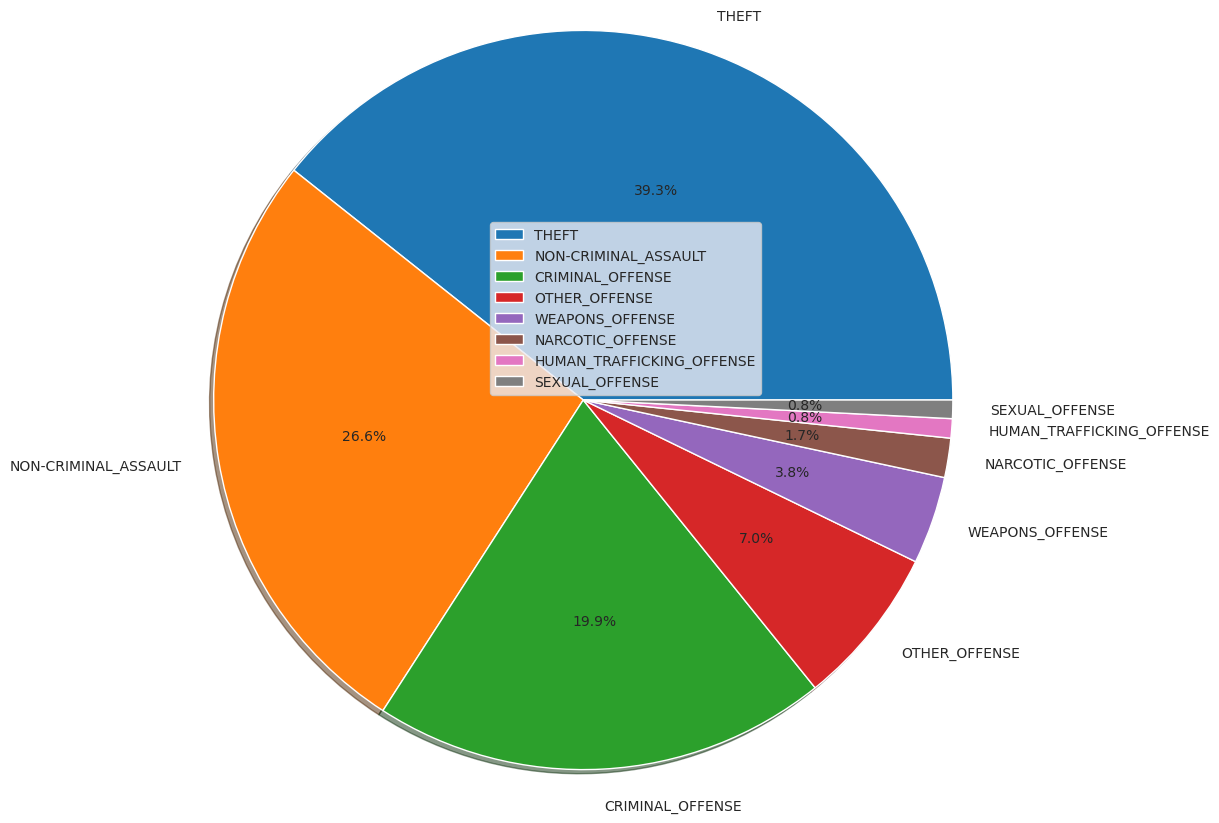

In [30]:
crimes_data_primary_type_pie = plt.pie(crimes_data.primary_type_grouped.value_counts(),labels=crimes_data.primary_type_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

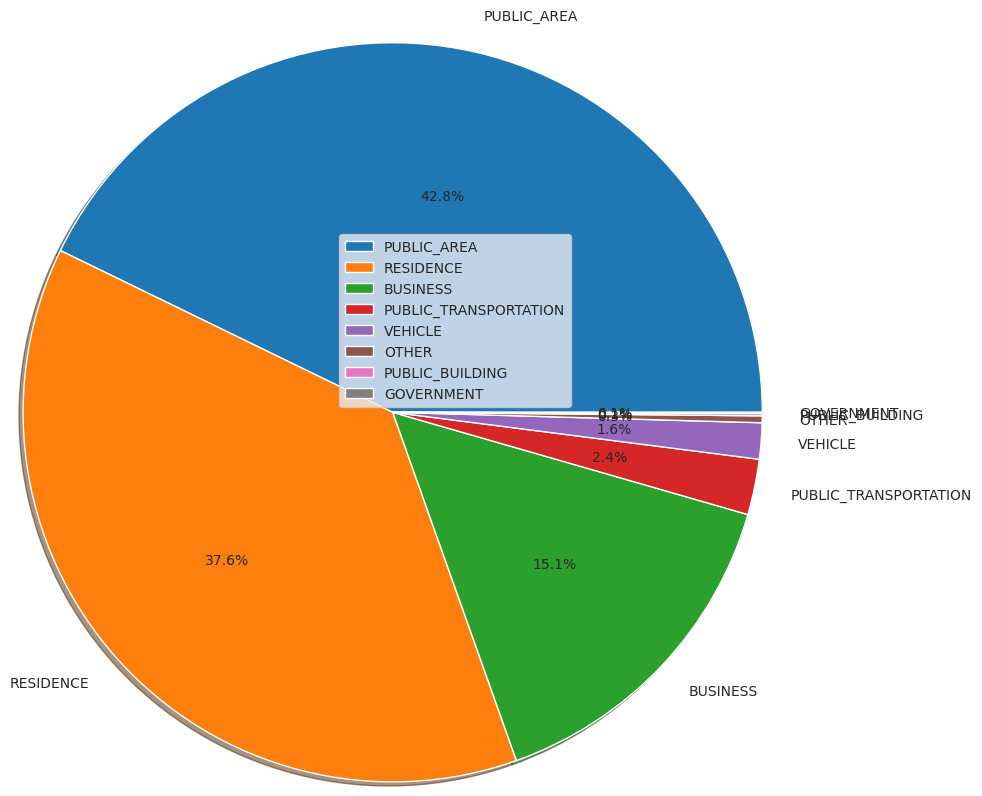

In [31]:
crimes_data_primary_type_pie = plt.pie(crimes_data.loc_grouped.value_counts(),labels=crimes_data.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

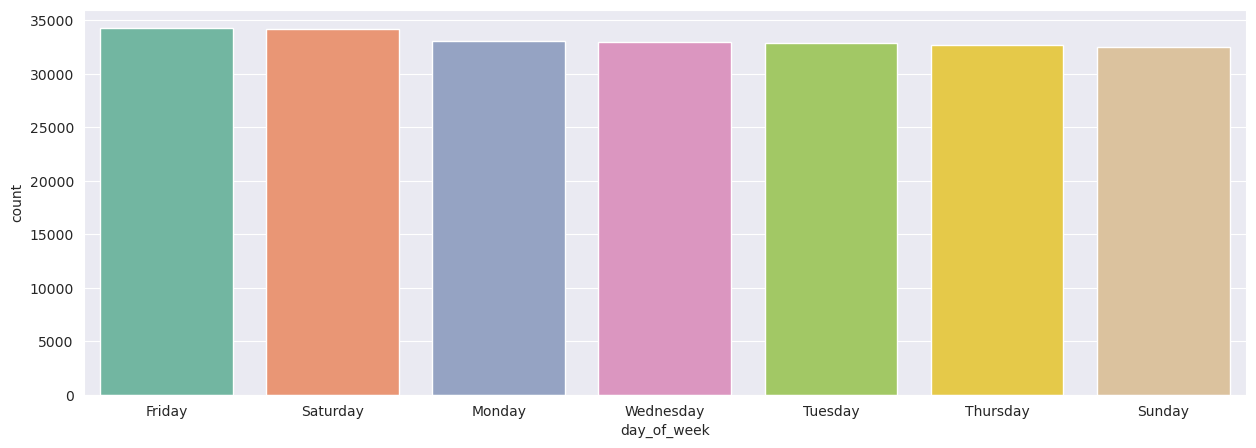

In [32]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

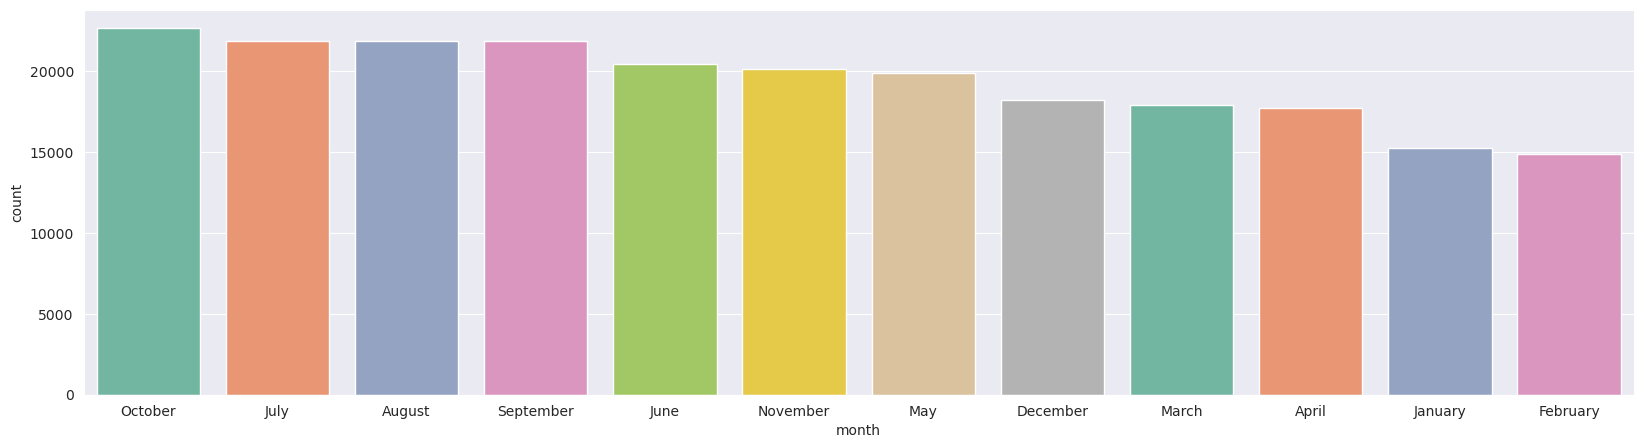

In [33]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',order=crimes_data.month.value_counts().index,palette='Set2')

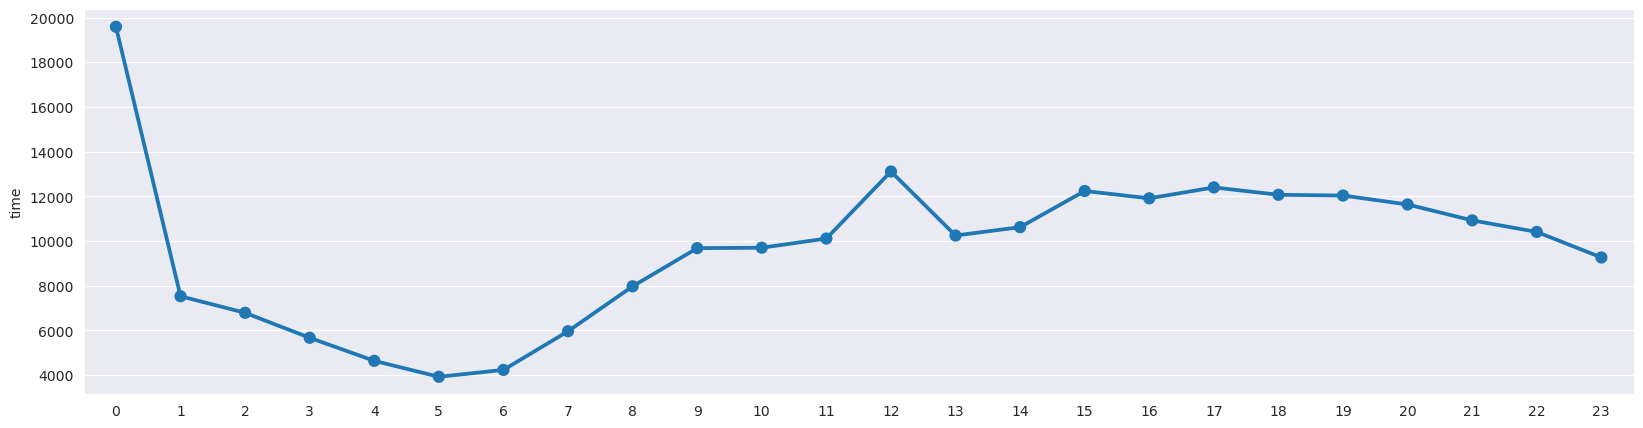

In [34]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data,x=crimes_data.time.value_counts().index,y=crimes_data.time.value_counts())

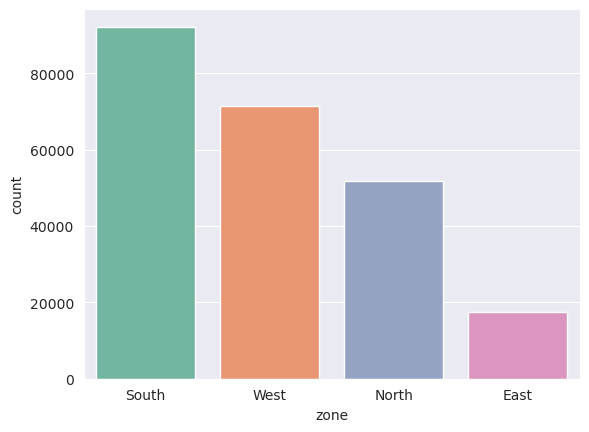

In [35]:
zone_plot = sns.countplot(data=crimes_data,x='zone',order=crimes_data.zone.value_counts().index,palette='Set2')

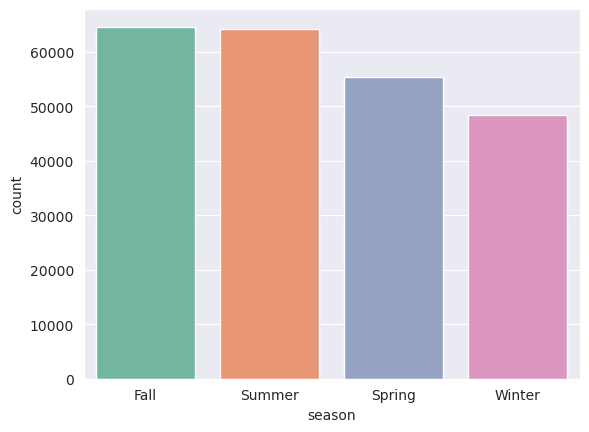

In [36]:
zone_plot = sns.countplot(data=crimes_data,x='season',order=crimes_data.season.value_counts().index,palette='Set2')

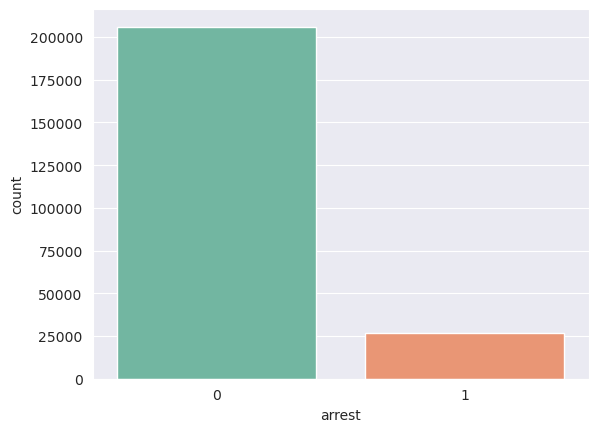

In [37]:
arrest_plot = sns.countplot(data=crimes_data,x='arrest',palette='Set2')

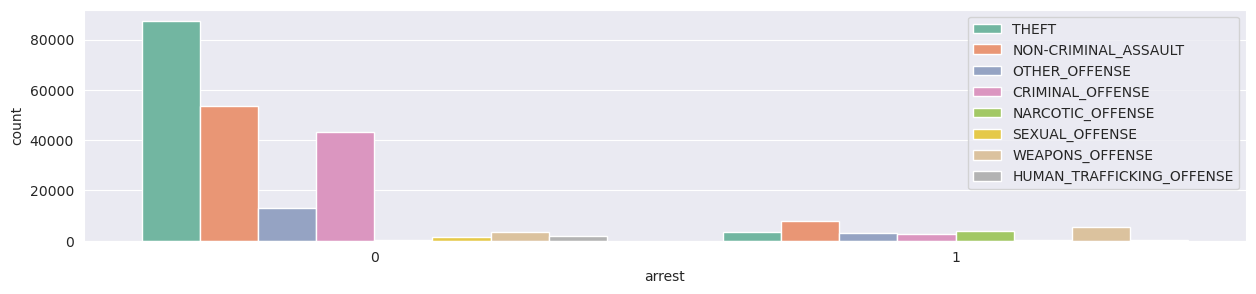

In [38]:
plt.figure(figsize=(15,3))
arrest_plot = sns.countplot(data=crimes_data,x='arrest',hue='primary_type_grouped',palette='Set2')
plt.legend(loc = 'best')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'STREET'),
  Text(1, 0, 'APARTMENT'),
  Text(2, 0, 'RESIDENCE'),
  Text(3, 0, 'SIDEWALK'),
  Text(4, 0, 'PARKING LOT / GARAGE (NON RESIDENTIAL)'),
  Text(5, 0, 'SMALL RETAIL STORE'),
  Text(6, 0, 'ALLEY'),
  Text(7, 0, 'RESTAURANT'),
  Text(8, 0, 'COMMERCIAL / BUSINESS OFFICE'),
  Text(9, 0, 'OTHER (SPECIFY)'),
  Text(10, 0, 'DEPARTMENT STORE'),
  Text(11, 0, 'VEHICLE NON-COMMERCIAL'),
  Text(12, 0, 'GAS STATION'),
  Text(13, 0, 'RESIDENCE - PORCH / HALLWAY'),
  Text(14, 0, 'RESIDENCE - GARAGE'),
  Text(15, 0, 'RESIDENCE - YARD (FRONT / BACK)'),
  Text(16, 0, 'GROCERY FOOD STORE'),
  Text(17, 0, 'PARK PROPERTY'),
  Text(18, 0, 'SCHOOL - PUBLIC BUILDING'),
  Text(19, 0, 'BAR OR TAVERN')])

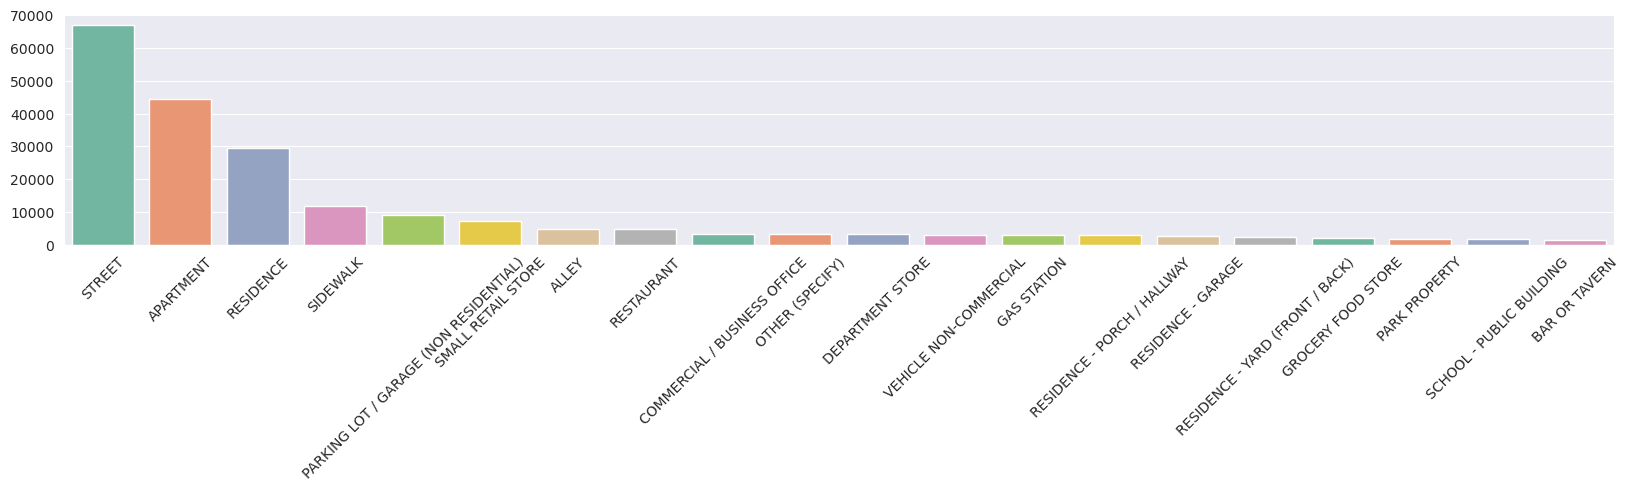

In [39]:
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(data=crimes_data,x=crimes_data.location_description.value_counts()[0:20].index,y=crimes_data.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

<Figure size 2000x1000 with 0 Axes>

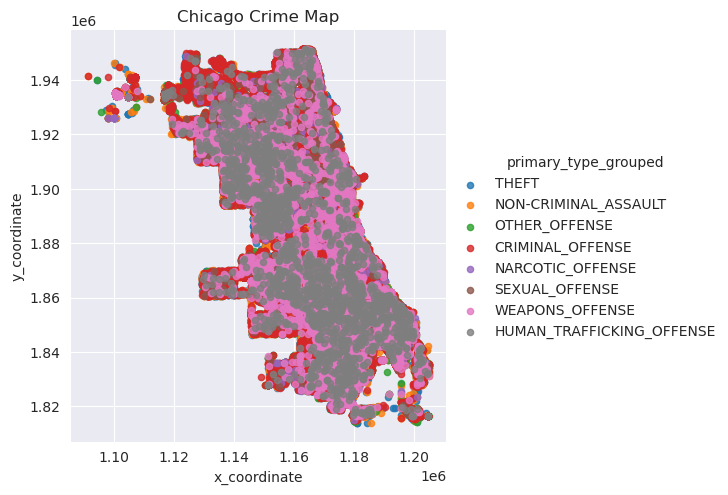

In [40]:
plt.figure(figsize=(20,10))
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate'] > 0) & (crimes_data['y_coordinate'] > 0)]
sns.lmplot(x='x_coordinate',
           y='y_coordinate',
           data=new_crimes_data,
           fit_reg=False,
           hue='primary_type_grouped',
           scatter_kws={"marker": "D", 
                        "s": 20})
ax = plt.gca()
ax.set_title('Chicago Crime Map')
plt.show()

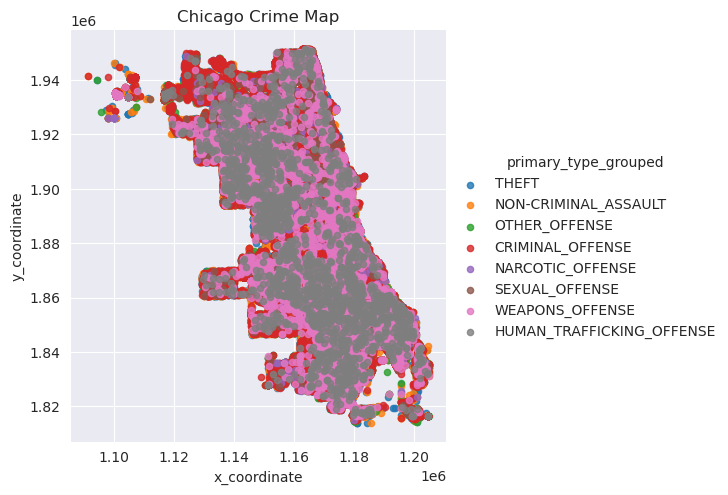

In [41]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate'] > 0) & (crimes_data['y_coordinate'] > 0)]
sns.lmplot(x='x_coordinate',
            y='y_coordinate',
            data=new_crimes_data,
            fit_reg=False,
            hue='primary_type_grouped',
            scatter_kws={"marker": "D",
                        "s": 20})
ax = plt.gca()
ax.set_title('Chicago Crime Map')
plt.show()

### Modelling

In [42]:
#Converting the numercial attributes to categorical attributes
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [43]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [44]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,1,0,2013,20,48.0,77,2022,41.990846,-87.666096,Tuesday,August,16,THEFT,West,Summer,PUBLIC_AREA
1,0,0,825,8,16.0,66,2022,41.780331,-87.684892,Wednesday,August,16,THEFT,South,Summer,PUBLIC_AREA
2,0,1,634,6,9.0,49,2022,41.722303,-87.623745,Thursday,August,10,THEFT,South,Summer,PUBLIC_AREA
3,0,0,815,8,14.0,57,2022,41.805347,-87.725961,Monday,August,21,NON-CRIMINAL_ASSAULT,South,Summer,RESIDENCE
4,0,0,1232,12,11.0,28,2022,41.860250,-87.646715,Tuesday,August,16,THEFT,South,Summer,PUBLIC_AREA


In [45]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232602 entries, 0 to 232601
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   arrest                232602 non-null  category
 1   domestic              232602 non-null  category
 2   beat                  232602 non-null  category
 3   district              232602 non-null  category
 4   ward                  232602 non-null  category
 5   community_area        232602 non-null  category
 6   year                  232602 non-null  category
 7   latitude              232602 non-null  float64 
 8   longitude             232602 non-null  float64 
 9   day_of_week           232602 non-null  object  
 10  month                 232602 non-null  object  
 11  time                  232602 non-null  category
 12  primary_type_grouped  231112 non-null  object  
 13  zone                  232602 non-null  object  
 14  season                232602 non-nul

In [46]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [47]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.990846,-87.666096,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,41.780331,-87.684892,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,41.722303,-87.623745,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,41.805347,-87.725961,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,41.860250,-87.646715,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [48]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.3, random_state=42)

In [49]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [311]:
#conda install scikit-learn


In [50]:
#Gaussain Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[35188 26607]
 [ 2676  5310]]


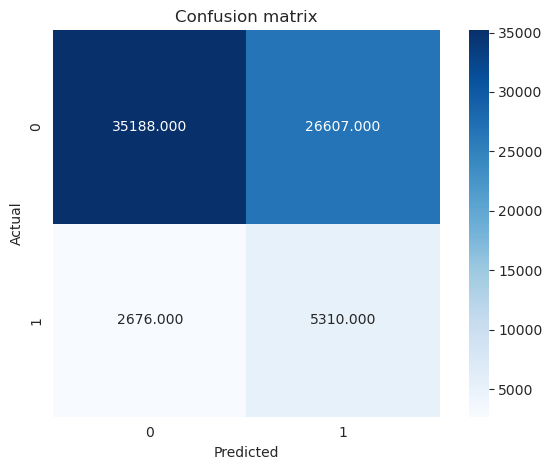

In [53]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [54]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5803585503217208
Error =  0.4196414496782792
Precision =  0.16636901964470344
Recall =  0.6649135987978964
F-1 Score =  0.2661454026013082
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.57      0.71     61795
           1       0.17      0.66      0.27      7986

    accuracy                           0.58     69781
   macro avg       0.55      0.62      0.49     69781
weighted avg       0.84      0.58      0.66     69781



In [55]:
# import pickle
import pickle

# save the model to disk
filename  = 'first-gaussian-model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [56]:
#Decision tree with Entropy as attribute measure
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
y_pred = model.predict(X_test)

In [58]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[56986  4809]
 [ 4519  3467]]


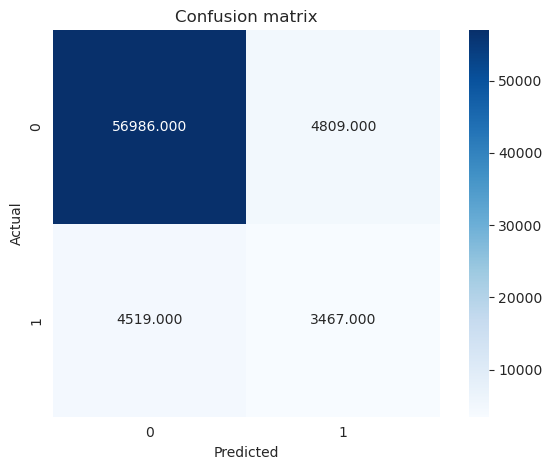

In [59]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [60]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8663246442441352
Error =  0.13367535575586476
Precision =  0.41892218463025616
Recall =  0.43413473578762835
F-1 Score =  0.42639281761160985
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     61795
           1       0.42      0.43      0.43      7986

    accuracy                           0.87     69781
   macro avg       0.67      0.68      0.68     69781
weighted avg       0.87      0.87      0.87     69781



In [61]:
# save the model to disk
filename  = 'decision-tree-classifier-model-87.sav'
pickle.dump(model, open(filename, 'wb'))

In [62]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [63]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[61064   731]
 [ 5393  2593]]


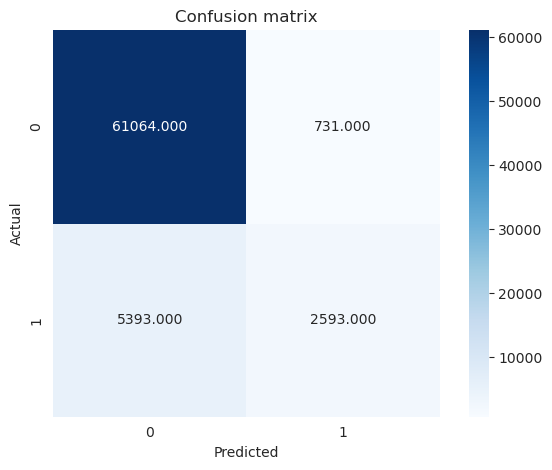

In [66]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [67]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.9122397214141386
Error =  0.08776027858586144
Precision =  0.7800842358604091
Recall =  0.3246932131229652
F-1 Score =  0.45853227232537574
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     61795
           1       0.78      0.32      0.46      7986

    accuracy                           0.91     69781
   macro avg       0.85      0.66      0.71     69781
weighted avg       0.90      0.91      0.90     69781



In [68]:
# save the model to disk
filename  = 'random-forest-classifier-model-91.sav'
pickle.dump(model, open(filename, 'wb'))

In [73]:
#Logistic Regression
classifier = LogisticRegression(random_state=42)


In [74]:

classifier.fit(X_train, y_train)


/home/desk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [75]:

y_pred = classifier.predict(X_test)


In [76]:

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[60908   887]
 [ 5301  2685]]


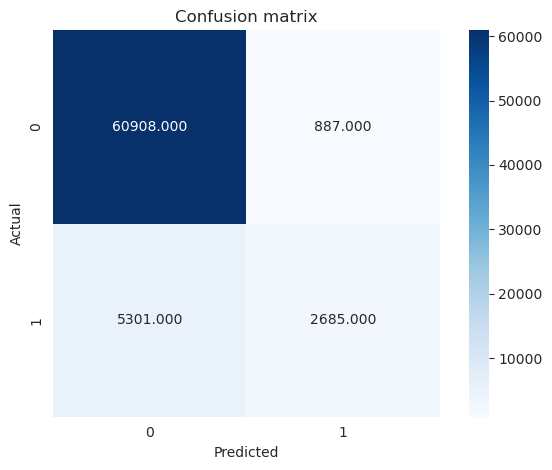

In [77]:

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [78]:

#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))



Accuracy =  0.9113225663146128
Error =  0.08867743368538716
Precision =  0.7516797312430011
Recall =  0.33621337340345603
F-1 Score =  0.464613254888389
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     61795
           1       0.75      0.34      0.46      7986

    accuracy                           0.91     69781
   macro avg       0.84      0.66      0.71     69781
weighted avg       0.90      0.91      0.90     69781



In [79]:
# save the model to disk
filename  = 'logistic-regression-model-91.sav'

pickle.dump(classifier, open(filename, 'wb'))


In [80]:
crimes_data_type = crimes_data.loc[crimes_data.primary_type_grouped.isin(['THEFT','NON-CRIMINAL_ASSAULT','CRIMINAL_OFFENSE'])]
crimes_data_prediction = crimes_data_type.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate','primary_type_grouped'],axis=1)
crimes_data_prediction_type = crimes_data_type.primary_type_grouped
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

# in the above code we have dropped the columns which are not required for prediction and also converted the categorical variables into dummy variables

In [81]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.990846,-87.666096,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,41.780331,-87.684892,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,41.722303,-87.623745,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,41.805347,-87.725961,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,41.860250,-87.646715,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction,crimes_data_prediction_type, test_size=0.3, random_state=42)

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [84]:
#Decision tree classifier for type of crime
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [86]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 4495  3343  6036]
 [ 3363  9555  5390]
 [ 6089  5535 15679]]


In [87]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.4997730520299235
Error =  0.5002269479700765
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.32      0.32      0.32     13874
NON-CRIMINAL_ASSAULT       0.52      0.52      0.52     18308
               THEFT       0.58      0.57      0.58     27303

            accuracy                           0.50     59485
           macro avg       0.47      0.47      0.47     59485
        weighted avg       0.50      0.50      0.50     59485



In [88]:
#Random Forest classifier for type of crime
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [89]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [90]:
y_pred = model.predict(X_test)

In [91]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 4135  2932  6807]
 [ 2349 10224  5735]
 [ 4476  4052 18775]]


In [92]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5570143733714382
Error =  0.4429856266285618
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.38      0.30      0.33     13874
NON-CRIMINAL_ASSAULT       0.59      0.56      0.58     18308
               THEFT       0.60      0.69      0.64     27303

            accuracy                           0.56     59485
           macro avg       0.52      0.51      0.52     59485
        weighted avg       0.55      0.56      0.55     59485



In [93]:
#Logistic Regression for predicting the type of crime -Best
classifier = LogisticRegression(random_state=42)

In [94]:
# FIT
classifier.fit(X_train, y_train)

/home/desk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [95]:
y_pred = classifier.predict(X_test)

In [348]:
# Compute confusion matrix

# print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

In [96]:
# Calculated the number of occrurances for each type of crime category in each district
district_crime_rates = pd.DataFrame(columns=['theft_count', 'assault_count', 'sexual_offense_count', 
                                             'weapons_offense_count', 'criminal_offense_count', 
                                             'human_trafficking_count', 'narcotic_offense_count', 
                                             'other_offense_count'])
district_crime_rates = district_crime_rates.astype(int) 

for i in range(1, 32):   
    temp_district_df = crimes_data[crimes_data['district'] == i] 

    temp_district_theft = temp_district_df[temp_district_df['primary_type_grouped'] == 'THEFT'] 
    num_theft = temp_district_theft.primary_type_grouped.count() 
    
    temp_district_assault = temp_district_df[temp_district_df['primary_type_grouped'] == 'NON-CRIMINAL_ASSAULT'] 
    num_assault = temp_district_assault.primary_type_grouped.count()    
    
    temp_district_sexual_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'SEXUAL_OFFENSE'] 
    num_sexual_offense = temp_district_sexual_offense.primary_type_grouped.count()
    
    temp_district_weapons_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'WEAPONS_OFFENSE'] 
    num_weapons_offense = temp_district_weapons_offense.primary_type_grouped.count()
    
    temp_district_criminal_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'CRIMINAL_OFFENSE'] 
    num_criminal_offense = temp_district_criminal_offense.primary_type_grouped.count()
    
    temp_district_human_trafficking = temp_district_df[temp_district_df['primary_type_grouped'] == 'HUMAN_TRAFFICKING_OFFENSE'] 
    num_human_trafficking = temp_district_human_trafficking.primary_type_grouped.count()
    
    temp_district_narcotic_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'NARCOTIC_OFFENSE'] 
    num_narcotic_offense = temp_district_narcotic_offense.primary_type_grouped.count()
    
    temp_district_other_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'OTHER_OFFENSE'] 
    num_other_offense = temp_district_other_offense.primary_type_grouped.count()

    district_crime_rates.loc[i] = [num_theft, num_assault, num_sexual_offense, num_weapons_offense, num_criminal_offense, num_human_trafficking, num_narcotic_offense, num_other_offense]    
    
#district_crime_rates.head()
    

In [97]:
# Standardize the data
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)
#district_crime_rates_standardized.head()

In [98]:
# Clustering with K-Means 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans1)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))
#kmeans_mean_cluster

#district_crime_rates.head()

In [99]:
# Clustering with DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 3, metric = "euclidean").fit(district_crime_rates_standardized)

# Show clusters
dbscan_clusters = clustering.labels_
# print(clusters)

district_crime_rates['dbscan_clusters'] = dbscan_clusters + 2
#district_crime_rates.head()

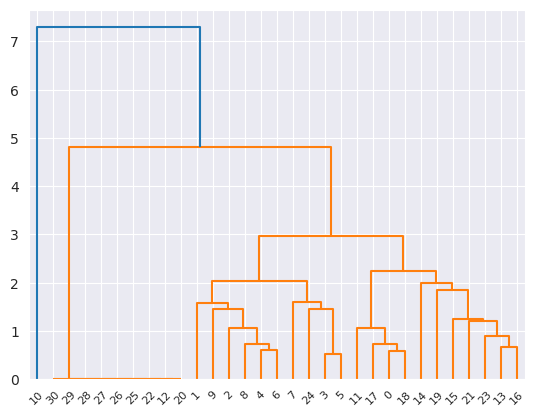

In [100]:
# Clustering with Hierarchical Clustering with average linkage
clustering = linkage(district_crime_rates_standardized, method = "average", metric = "euclidean")

# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

# Form clusters
hierarchical_clusters = fcluster(clustering, 4, criterion = 'maxclust')
# print(clusters)

district_crime_rates['hierarchical_clusters'] = hierarchical_clusters 
#district_crime_rates.head()

In [101]:
# Add 'district' column
district_crime_rates['district'] = district_crime_rates.index
district_crime_rates = district_crime_rates[['district', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters', 'theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count']]

In [102]:
# Remove all columns but 'district' & each method's cluster
district_crime_rates = district_crime_rates.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count'], axis=1)
district_crime_rates.head(31)

,district,kmeans_cluster,dbscan_clusters,hierarchical_clusters
1,1,4,2,3
2,2,4,1,2
3,3,1,1,2
4,4,1,1,2
5,5,1,3,2
6,6,1,1,2
7,7,1,3,2
8,8,1,1,2
9,9,1,3,2
10,10,1,1,2


In [103]:
# Merge each district's clusters for each method into a single dataframe 
crimes_data_clustered = pd.merge(crimes_data, district_crime_rates, on='district', how='inner')
#crimes_data.head()

<Figure size 2000x1000 with 0 Axes>

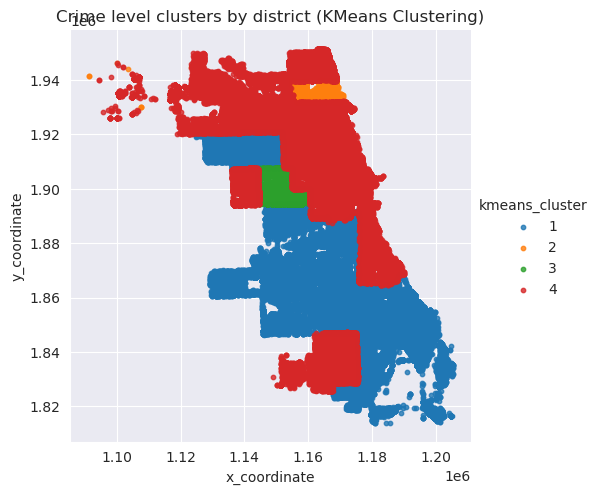

In [104]:
# Plot Crime level clusters by district (KMeans Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]

plt.figure(figsize=(20,10))
sns.lmplot(x='x_coordinate', y='y_coordinate', data=new_crimes_data, fit_reg=False, hue='kmeans_cluster', legend=True, scatter_kws={"s": 10})
plt.title('Crime level clusters by district (KMeans Clustering)')
plt.show()

# in the above plot, we can see that the crimes are clustered in 4 different clusters.



<Figure size 2000x1000 with 0 Axes>

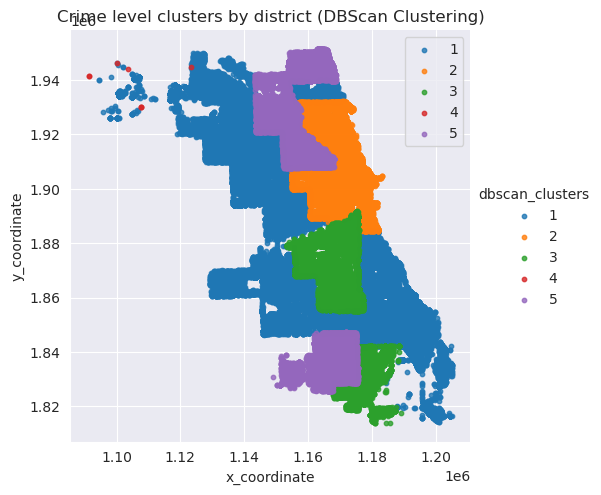

In [105]:
# Crime level clusters by district (DBScan Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]

plt.figure(figsize=(20,10))
sns.lmplot(x='x_coordinate', y='y_coordinate', data=new_crimes_data, fit_reg=False, hue='dbscan_clusters', legend=True, scatter_kws={"s": 10})
plt.title('Crime level clusters by district (DBScan Clustering)')
plt.legend(loc='upper right')
plt.show()

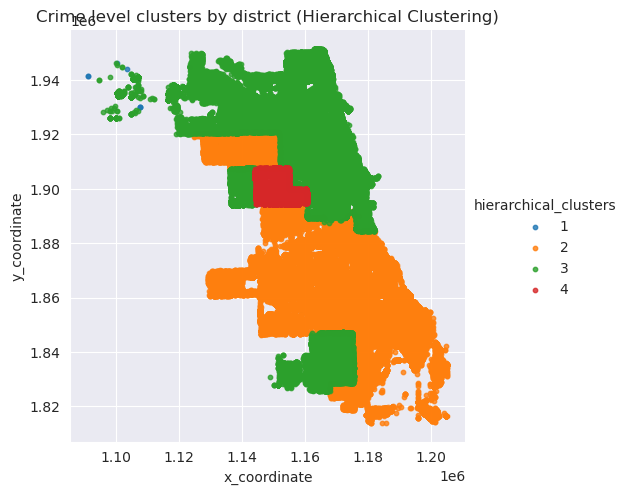

In [106]:
# Crime level clusters by district (Hierarchical Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot(x='x_coordinate', y='y_coordinate', data=new_crimes_data, fit_reg=False, hue='hierarchical_clusters', legend=True, scatter_kws={"s": 10})
plt.title('Crime level clusters by district (Hierarchical Clustering)')
plt.show()

Finally, we can conclude that by analyzing the crime data using different data science models, we see that the South and West zones are more prone to crimes than the East and North Zones, Also a lot of theft related incidents are happening within the city which, the chances of the criminal being arrested for high profiles crimes like narcotics and sexual offence is high whereas for the battery and robbery related crimes very few criminals are arrested.

By deploying suitable forces within the Residential and Public areas around the South and West zones of the city in the summer and spring months, the number of crimes can possibly be reduced.

In [359]:
# we have used 3 different clustering methods to cluster the crimes in chicago: KMeans, DBScan and Hierarchical Clustering.
from django.shortcuts import render
from django.http import HttpResponse

# django views.py code to get the crime clusters for each district
def get_crime_clusters(request):
    # get the crime clusters for each district
    crimes_data_clustered = pd.merge(crimes_data, district_crime_rates, on='district', how='inner')
    crimes_data_clustered = crimes_data_clustered.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count'], axis=1)
    crimes_data_clustered = crimes_data_clustered.drop_duplicates(subset=['district'], keep='first')
    crimes_data_clustered = crimes_data_clustered[['district', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters']]
    crimes_data_clustered = crimes_data_clustered.to_json(orient='records')
    return HttpResponse(crimes_data_clustered, content_type='application/json')
